# Lazyfit 2D fitting

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..\..'))
import lazyfit

In [44]:
import importlib

# Test case: 2D gaussian

As an example, consider a dataset resembling a Lorentzian plus a linear background.
Fitting a Lorentzian and extracting its position and width is a common problem in spectroscopy.

In [45]:
importlib.reload(lazyfit.models2d)

<module 'lazyfit.models2d' from 'C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks\\..\\..\\lazyfit\\models2d.py'>

In [46]:
# test data parameters
A = 256
x0 = 0.5
y0 = -1
sx = 1
sy = 0.5
p = 0.2
B = 50

x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 1, 90)
xmat, ymat = np.meshgrid(x, y)
z = np.random.poisson(lam=lazyfit.models2d.gaussian2d.f(xmat, ymat, A, x0, y0, sx, sy, p, B))
dz = np.sqrt(z)

In [47]:
xmat.shape

(90, 100)

C:\Users\marti\AppData\Local\Temp/ipykernel_5628/1028057364.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z)


Text(0, 0.5, 'Y value')

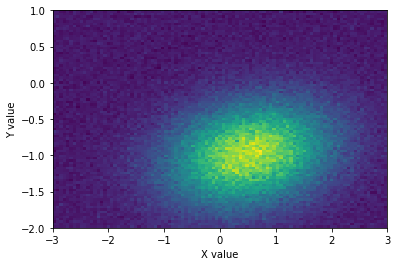

In [48]:
plt.pcolormesh(x, y, z)
plt.xlabel('X value')
plt.ylabel('Y value')

# Fitting

In [49]:
importlib.reload(lazyfit)
importlib.reload(lazyfit.wrapper2d)
importlib.reload(lazyfit.models2d)

<module 'lazyfit.models2d' from 'C:\\Dropbox\\Programming\\Python\\lazyfit\\Test Notebooks\\..\\..\\lazyfit\\models2d.py'>

In [50]:
fit = lazyfit.fit2d('gaussian2d', x, y, z, dz,)

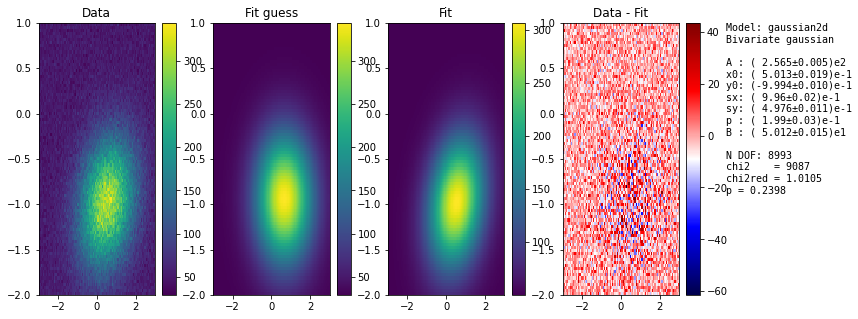

In [51]:
fit.plot(plot_guess=True);

## Retrieving fit parameters 

In [52]:
fit.params # get fit parameters in the order they are specified in the fit model

array([ 2.56465818e+02,  5.01340061e-01, -9.99383118e-01,  9.96368921e-01,
        4.97583261e-01,  1.99124131e-01,  5.01160604e+01])

In [53]:
fit.errors # get errors on the fit parameters (this is the square root of the covariance matrix diagonal)

array([0.49641708, 0.00191251, 0.0009635 , 0.00219932, 0.00111648,
       0.00263122, 0.15136753])

In [54]:
fit.params_dict # get fit paramters as a dictionary

{'A': 256.4658181360433,
 'x0': 0.5013400605810143,
 'y0': -0.9993831184467149,
 'sx': 0.9963689212570775,
 'sy': 0.4975832612268204,
 'p': 0.1991241307619927,
 'B': 50.11606038305769}

In [55]:
fit.errors_dict # fit errors as a dictionary

{'A': 0.4964170848121744,
 'x0': 0.0019125116594297387,
 'y0': 0.0009635011057400293,
 'sx': 0.002199315514441185,
 'sy': 0.00111648306490294,
 'p': 0.002631221992864346,
 'B': 0.15136752828458758}

In [56]:
fit.COVB # covarience matrix

array([[ 2.46429922e-01,  3.21269189e-07,  8.96566323e-06,
        -4.44685812e-04, -2.36100762e-04, -9.13451538e-06,
        -4.62856532e-03],
       [ 3.21269189e-07,  3.65770085e-06,  3.70135940e-07,
        -1.64122451e-10, -2.32980214e-08, -3.08030042e-08,
         2.24360231e-06],
       [ 8.96566323e-06,  3.70135940e-07,  9.28334381e-07,
         3.10821992e-08, -2.54849867e-08, -1.50577430e-08,
        -4.57197443e-06],
       [-4.44685812e-04, -1.64122451e-10,  3.10821992e-08,
         4.83698873e-06,  6.14023335e-07,  6.92945231e-07,
        -1.60632254e-04],
       [-2.36100762e-04, -2.32980214e-08, -2.54849867e-08,
         6.14023335e-07,  1.24653443e-06,  3.62142485e-07,
        -7.61607431e-05],
       [-9.13451538e-06, -3.08030042e-08, -1.50577430e-08,
         6.92945231e-07,  3.62142485e-07,  6.92332918e-06,
         6.44762882e-06],
       [-4.62856532e-03,  2.24360231e-06, -4.57197443e-06,
        -1.60632254e-04, -7.61607431e-05,  6.44762882e-06,
         2.2912128

### Debugging mode

By calling lazyfit.fit() the fitting routine is automatically called. If you wish to inspect the data and parameter guess before fitting you can create the Wrapper object without lazyfit.Wrapper() using the same keyword arguments as lazyfit.fit()

In [57]:
wrapper = lazyfit.Wrapper('lorentz', x, y, dy) # same arguments and keywords a

NameError: name 'dy' is not defined

In [27]:
wrapper.guess # inspect the fit parameter guess

[485, 100.20408163265306, 2.857142857142861, 37]

In [28]:
wrapper.fit() # invoke the fitting